# Visualizing NFL Player Frame before the NFL Big Data Bowl

### Data Loading and Transformation

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Advanced Sports Analytics/data/frame_test_input.csv'
df = pd.read_csv(path)

Mounted at /content/drive


### Visualizing Acceleration Distribution by Position

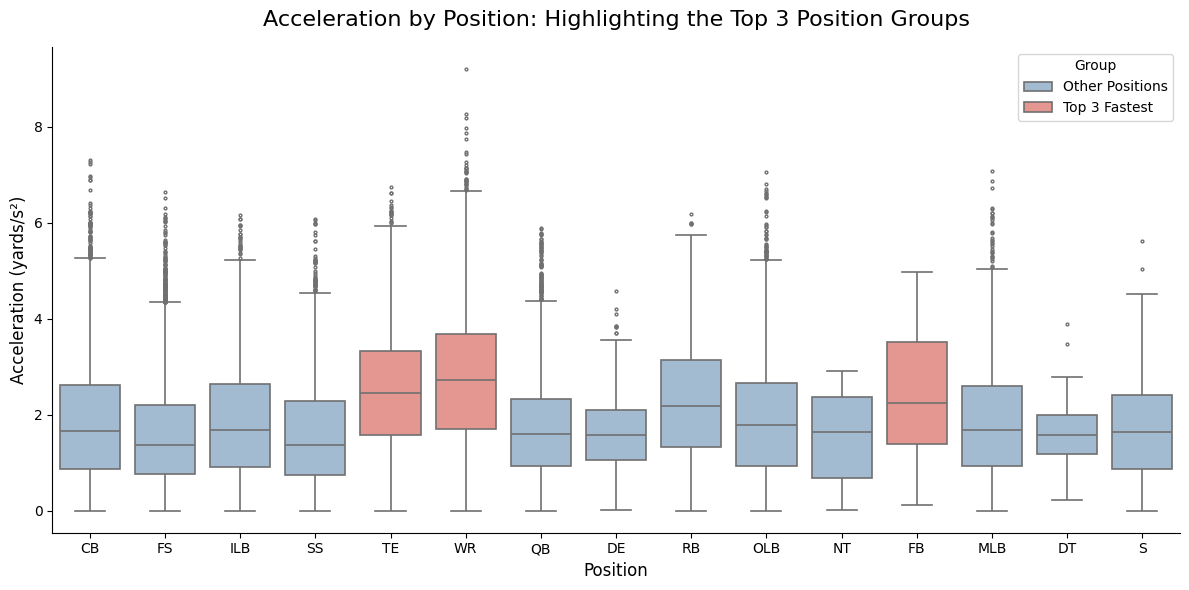

In [ ]:
# Compute mean acceleration per position
mean_accel = df.groupby('player_position')['a'].mean().sort_values(ascending=False)
top3_positions = mean_accel.head(3).index.tolist()

# Add color flag
df['color_group'] = df['player_position'].apply(lambda pos: 'Top 3 Fastest' if pos in top3_positions else 'Other Positions')

# Assign colors
palette = {'Top 3 Fastest': '#f28b82', 'Other Positions': '#9bbcd9'}

# Plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='player_position', y='a', hue='color_group', palette=palette, dodge=False, fliersize=2, linewidth=1.2)

# Tidy up
plt.title("Acceleration by Position: Highlighting the Top 3 Position Groups", fontsize=16, pad=15)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Acceleration (yards/s²)", fontsize=12)
plt.legend(title="Group", loc="upper right")
sns.despine()
plt.tight_layout()
plt.show()

### Visualizing Quarterback Body Orientation

/tmp/ipython-input-2785865591.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qb['o'] = df_qb['o'] % 360


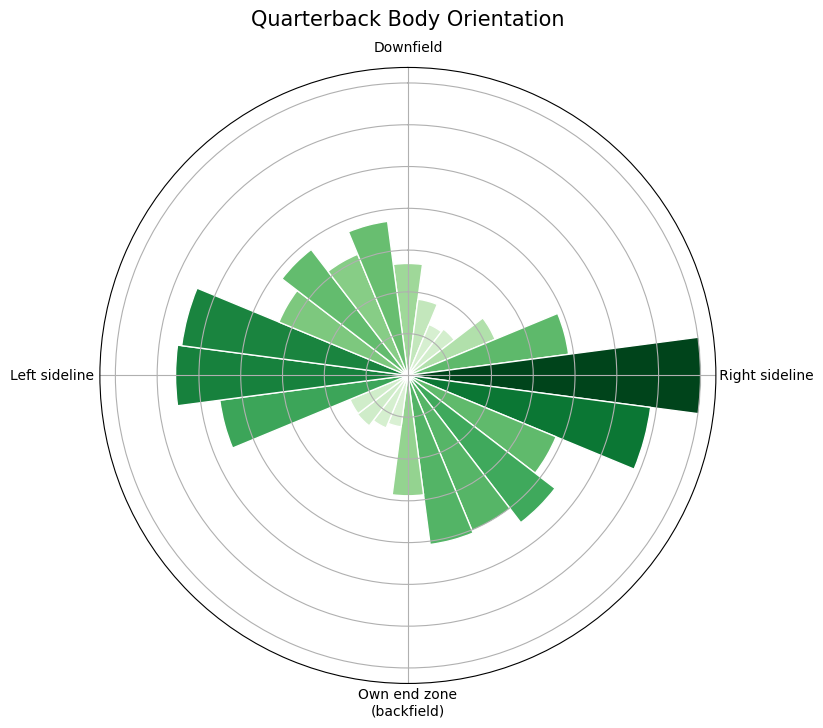

In [ ]:
# Filter for passers
df_qb = df[df['player_role'] == 'Passer']

# Set an limit for orientation degrees (0–360)
df_qb['o'] = df_qb['o'] % 360

# Bin the angles
bins = np.arange(0, 361, 15)
counts, _ = np.histogram(df_qb['o'], bins=bins)

# Setup polar
theta = np.deg2rad(bins[:-1])
width = np.deg2rad(15)

# Plot
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, counts, width=width, color=plt.cm.Greens(counts / counts.max()), edgecolor='white')

# Tidy up
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticks(np.deg2rad([0, 90, 180, 270]))
ax.set_xticklabels(["Downfield", "              Right sideline", "Own end zone\n(backfield)", "Left sideline             "], fontsize=10)
ax.set_yticklabels([])
ax.set_title("Quarterback Body Orientation", pad=30, fontsize=15)
plt.show()